Since using imshow function from cv2 was not working properly, I imported pyplot from matplotlib in order to check the image. Rest of the methods are exclusively from libraries numpy and cv2. 

In [1]:
import numpy as np
import cv2

%matplotlib inline
from matplotlib import pyplot as plt

Reading the upsampled.png and gray-scale the image.<br>
Convert the image into np.float32. <br>
Check the image.<br>
Do the same thing with ground truth image HR.png

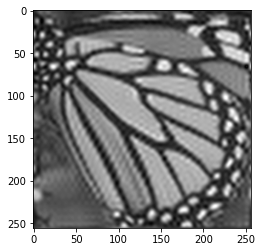

In [2]:
image_h= cv2.imread('upsampled.png')
image_h=cv2.cvtColor(image_h,cv2.COLOR_BGR2GRAY).astype(np.float32)
plt.imshow(image_h,'gray')

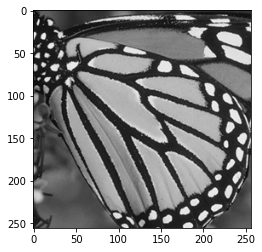

In [3]:
image_gt=cv2.imread('HR.png')
image_gt=cv2.cvtColor(image_gt,cv2.COLOR_BGR2GRAY).astype(np.float32)
plt.imshow(image_gt,'gray')

resize the HR.png and make __image_l__

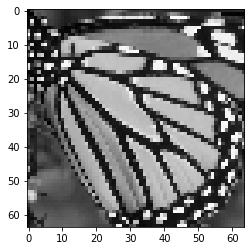

In [4]:
height, width=image_h.shape
image_l=cv2.resize(image_gt,(height//4,width//4))
plt.imshow(image_l,'gray')

Define the __mse__ and __PSNR__ function

In [5]:
def mse(img):
    MSE=np.sum(np.square(image_gt-img))/(height*width)
    return MSE

def PSNR(img):
    psnr=10*np.log10(255*255/mse(img))
    return psnr

Compute the PSNR of the __image_h__

In [6]:
print(PSNR(image_h))

18.00910086146031


Calculate the gradient descent<br>
Print out loss every 100 times

In [7]:
lr=0.1
MAX_ITERATION=1000
loss_list=[]
i_list=[]
for i in range(MAX_ITERATION):
    image_d=cv2.resize(image_h, (height//4,width//4))
    grad=cv2.resize(image_d-image_l,(height,width))
    image_h=image_h-np.dot(lr,grad)
    loss=np.sum(np.square(image_l-image_d))
    if i%100==0:
        print(f"Loss in every 100 iterations : {loss}")
        loss_list.append(loss)
        i_list.append(i)

Loss in every 100 iterations : 3164451.5
Loss in every 100 iterations : 1.7312639192485366
Loss in every 100 iterations : 6.458644241950041e-06
Loss in every 100 iterations : 3.816949152690503e-11
Loss in every 100 iterations : 2.6710663453142563e-16
Loss in every 100 iterations : 2.0351028457964124e-21
Loss in every 100 iterations : 6.864016313669894e-23
Loss in every 100 iterations : 6.858669729998668e-23
Loss in every 100 iterations : 6.858669729998668e-23
Loss in every 100 iterations : 6.858669729998668e-23


Using plot function from pyplot, we can see that the loss decreased.

<function matplotlib.pyplot.show(close=None, block=None)>

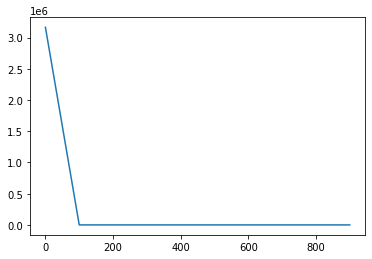

In [8]:
plt.plot(i_list,loss_list)
plt.show

Save the final image_h after gradient descent.<br>
Show the __image_h__ and compute the PSNR of __image_h__

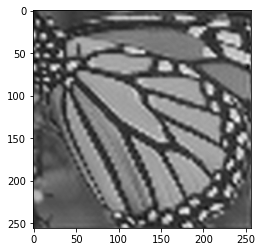

In [9]:
cv2.imwrite('Final-High-Resolution-Image.png',image_h)
plt.imshow(image_h,cmap='gray')


In [10]:
print(PSNR(image_h))

20.707713414774783


Since the PSNR of __image_h__ increased from about 18.0 to 20.7, we can know that the code for super resolution via gradient descent is valid. 